In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

2023-06-04 19:24:28.602942: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2023-06-04 19:24:29.391075: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-04 19:24:29.391423: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-04 19:24:29.391908: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-06-04 19:24:29.395857: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-04 19:24:29.395961: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 na

In [5]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


2023-06-04 19:24:29.799338: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-04 19:24:29.799467: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-04 19:24:29.799605: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.635GHz coreCount: 14 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-06-04 19:24:29.799642: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-06-04 19:24:29.799661: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-06-04 19:24:29.799670: I tensorflow/stream_executor/platform

## Data augmentation for images
Data augmentation could consist of things like flipping the image horizontally or vertically, rotating the image, zooming in or out, cropping, or varying the color.

it will help us obtain more data for training and reduce overfitting.

In [6]:
import plotImages as pltI

In [7]:
# We'll now define this variable called gen as an ImageDataGenerator. All the parameters being passed are the different ways we're telling Keras to augment the image.
gen=ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, zoom_range=0.2, channel_shift_range=10.0, horizontal_flip=True)

In [8]:
# Choose a random image
chosen_image= random.choice(os.listdir('../data/dogs-vs-cats/train/cat/'))
image_path='../data/dogs-vs-cats/train/cat/' + chosen_image

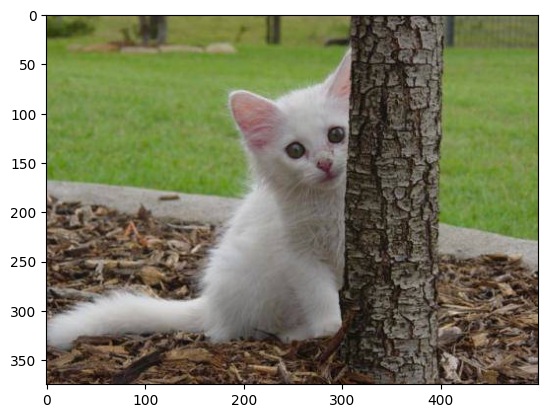

In [9]:
image=np.expand_dims(plt.imread(image_path),0)  ## is used to add an extra dimension at position 0 to the result of plt.imread(image_path) in order to be compatible for how we'll use it later
plt.imshow(image[0])

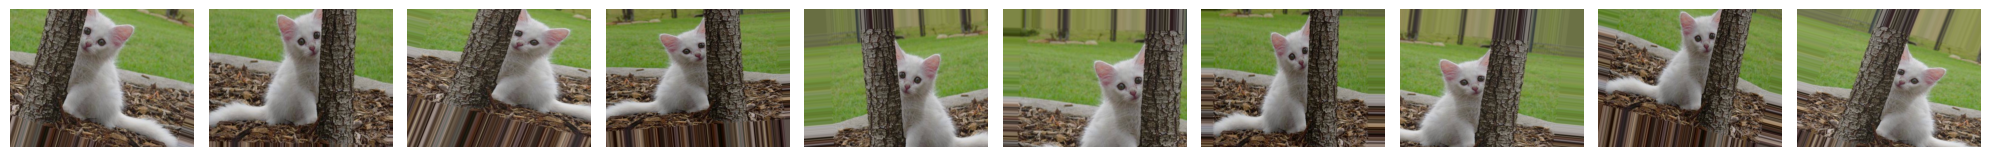

In [11]:
# The flow() function takes numpy data and generates batches of augmented data.
aug_iter = gen.flow(image, save_to_dir='../data/dogs-vs-cats/train/cat/', save_prefix='aug-image-', save_format='jpeg')

aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)] # we generate 10 augmented images by iterating over the aug_iter iterator and extracts the augmented images from each batch

pltI.plotImages(aug_images)